# データの作成，モジュールのインポート

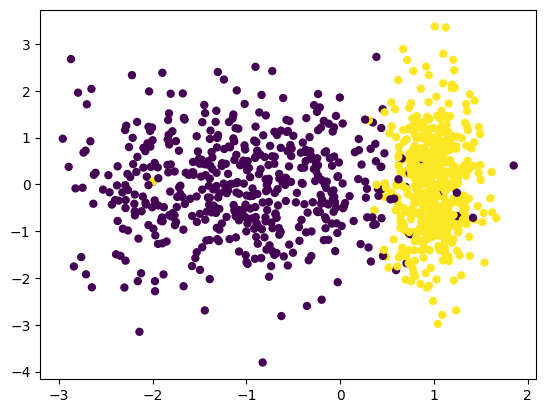

In [694]:
import time
import random
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as patches

N = 1000 #データの数
d = 2 # 次元数
K = 2 # クラス数

X, y = make_classification(
    n_samples=N,
    n_features=d,
    n_informative=1,
    n_redundant=0,
    n_clusters_per_class=1,
    n_classes=K,
    random_state=20
)

plt.scatter(X[:, 0], X[:, 1], marker="o", c=y, s=25) #c = yで色指定できる
plt.show()

# 本家

## モデルのインスタンス化

In [697]:
model = LogisticRegression(
    penalty=None, # 正則化なし
    tol=0.0001, #誤差の許容値
    fit_intercept= True, # バイアス項なし．
    solver='newton-cg', # 最適化関数に，共役勾配ニュートン法を使用
    max_iter=100, # 最大更新回数
    warm_start=False, # 前のソリューションの値の重みを持ってくるか．嫌なのでFalse
    n_jobs=None # 使用するcpuのコア数
    )

## モデルの学習

In [715]:
start = time.time()
model.fit(X,y)
end = time.time()
time_diff = end - start
print('学習にかかった時間',time_diff)
print('クラス数',model.classes_)
print('特徴量の数',model.n_features_in_)
print('coef，重み',model.coef_)
print('intercept，バイアス',model.intercept_)
print('更新回数',model.n_iter_)

学習にかかった時間 0.004658222198486328
クラス数 [0 1]
特徴量の数 2
coef，重み [[6.40405694 0.09853813]]
intercept，バイアス [-2.73566571]
更新回数 [7]


# スクラッチ実装

In [4]:
class SLogisticRegression():
    def __init__(self, tol: float=0.0001, max_iter: int=100):
        self.tol = tol
        self.max_iter = max_iter

    @staticmethod
    def _sigmoid(Xw):
        return 1 / (1 + np.exp(-Xw))

    def fit(self, x, y):
        self.w = np.random.randn(x.shape[1])
        self.r = np.empty(x.shape[0])
        tol_vec = np.full(x.shape[1],self.tol)
        diff = np.full(x.shape[1], np.inf)
        self.iter=0
        while np.any(diff > tol_vec) and (self.iter < self.max_iter):
            y_hat = self._sigmoid(x @ self.w)
            for _ in range(X.shape[0]):
                self.r[_] = y_hat[_] * (1 - y_hat[_])
            xr = x.T * self.r
            w_new = np.dot((np.linalg.solve(np.dot(xr,x), xr)),
                           (np.dot(x, self.w) - (1 / self.r * (y_hat - y))))

            self.iter += 1
            diff = w_new - self.w
            self.w = w_new

    def predict(self, x):
        y_hat_Xw = np.dot(x, self.w)
        self.predict_proba = self._sigmoid(y_hat_Xw)
        y_pred = self.predict_proba.copy()
        for _ in range(x.shape[0]):
            if y_pred[_] > .5:
                y_pred[_] = 1
            elif y_pred[_] < .5:
                y_pred[_] = 0
        return y_pred

In [5]:
start = time.time()
model.fit(X,y)
end = time.time()
time_diff = end - start
print('実行時間',time_diff)
print('クラス数',model.classes_)
print('特徴量の数',model.n_features_in_)
print('coef',model.coef_)
# print('intercept',model.intercept_)
print('反復数',model.n_iter_)

実行時間 0.0034189224243164062
クラス数 [0 1]
特徴量の数 2
coef [[3.62605703 0.07726773]]
反復数 [5]


In [6]:
model = LogisticRegression(
    tol=0.0001,
    max_iter=100
)

start = time.time()
model.fit(X,y)
end = time.time()
time_diff = end - start
print('実行時間',time_diff)

print("coef_",model.w)
pred = model.predict(X)
print("更新回数", model.iter)

実行時間 0.004042863845825195


AttributeError: 'LogisticRegression' object has no attribute 'w'

In [ ]:
class SLogisticRegression():
    def __init__(self, tol: float=0.0001, max_iter: int=100):
        self.tol = tol
        self.max_iter = max_iter

    @staticmethod
    def _sigmoid(Xw):
        return 1 / (1 + np.exp(-Xw))

    def fit(self, x, y):
        self.w = np.random.randn(x.shape[1])
        # self.R = np.identity(x.shape[0])
        tol_vec = np.full(x.shape[1],self.tol)
        diff = np.full(x.shape[1], np.inf)
        self.tol_=0
        while np.any(diff > tol_vec) and (self.tol_ < self.max_iter):
            y_hat = self._sigmoid(x @ self.w)
            # for _ in range(X.shape[0]):
            #     self.R[_,_] = y_hat[_] * (1 - y_hat[_])
            R = np.diag(y_hat * (1 - y_hat))
            xr = x.T @ R
            w_new = (np.linalg.pinv(xr @ x) @ xr) @ (x @ self.w - np.linalg.pinv(R) @ (y_hat - y))
            diff = w_new - self.w
            self.tol_ += 1
            self.w = w_new

    def predict(self, x):
        y_hat_Xw = np.dot(x, self.w)
        y_pred = self._sigmoid(y_hat_Xw)
        for _ in range(x.shape[0]):
            if y_pred[_] > 0.5:
                y_pred[_] = 1
            elif y_pred[_] < 0.5:
                y_pred[_] = 0
        return y_pred

In [ ]:
model = SLogisticRegression(
    tol=0.0001,
    max_iter=100
)

start = time.time()
model.fit(X,y)
end = time.time()
time_diff = end - start
print('実行時間',time_diff)

print("coef_",model.w)
pred = model.predict(X)
print("更新回数", model.tol_)

実行時間 7.805652141571045
coef_ [3.62964534 0.07741521]
更新回数 7


In [ ]:
class LogisticRegression():
    def __init__(self, tol: float=0.0001, max_iter: int=100):
        self.tol = tol
        self.max_iter = max_iter

    @staticmethod
    def _sigmoid(...): # クラス内部で使う関数なので，アンダースコアをつける
        # シグモイド関数を実装する．
        return ...

    def fit(self, x, y):
        # 学習部分
        ...

    def predict(self, x):
        # 予測部分
        return ...

In [ ]:
class LogisticRegression():
    def __init__(self, tol: float=0.0001, max_iter: int=100):
        self.tol = tol
        self.max_iter = max_iter

    @staticmethod
    def _sigmoid(Xw):
        return 1 / (1 + np.exp(-Xw))

    def fit(self, x, y):
        # 重みの初期化
        self.w = np.random.randn(x.shape[1])
        # 収束判定用のベクトル
        tol_vec = np.full(x.shape[1],self.tol)
        diff = np.full(x.shape[1], np.inf)
        # 更新回数の初期化
        self.iter = 0
        # 学習開始
        while np.any(diff > tol_vec) and (self.iter < self.max_iter):
            # 予測値の計算
            y_hat = self._sigmoid(x @ self.w)
            # ヘッセ行列のための，対角行列を作成
            R = y_hat * (1 - y_hat)
            # ニュートン法(w_new = w - ({X^TRX}^-1)X^T(y^-y))による重みの更新
            # w_new = self.w - (np.linalg.pinv((x.T @ R) @ x) @ x.T @ (y_hat - y))
            w_new = self.w - (np.linalg.solve(((x.T * R) @ x), x.T @ (y_hat - y)))
            # 更新
            diff = w_new - self.w
            self.iter += 1
            self.w = w_new

    def predict(self, x):
        # 予測値の計算
        y_hat_Xw = np.dot(x, self.w)
        y_pred = self._sigmoid(y_hat_Xw)
        # 確率に基づいて分類
        for _ in range(x.shape[0]):
            if y_pred[_] > 0.5:
                y_pred[_] = 1
            elif y_pred[_] < 0.5:
                y_pred[_] = 0
        return y_pred

In [ ]:
model = LogisticRegression(
    tol=0.0001,
    max_iter=100
)

start = time.time()
model.fit(X,y)
end = time.time()
time_diff = end - start
print('実行時間',time_diff)

print("coef_",model.w)
pred = model.predict(X)
print("更新回数", model.iter)

実行時間 0.003117799758911133
coef_ [3.62964534 0.07741521]
更新回数 7


In [716]:
class LogisticRegression:
    def __init__(
        self,
        tol: float = 0.0001,
        max_iter: int = 100,
        fit_intercept: bool = True
    ):
        """logistic regression model."""
        self.tol = tol
        self.max_iter = max_iter
        self.fit_intercept = fit_intercept

    @staticmethod
    def _sigmoid(x: np.ndarray) -> np.ndarray:
        """
        sigmoid function.

        Args:
            x (np.ndarray): Input data.

        Returns:
            np.ndarray: sigmoid function result.
        """
        return 1 / (1 + np.exp(-x))

    def fit(self, X: np.ndarray, y: np.ndarray):
        """
        Training model using Newton method.

        Args:
            x (np.ndarray): Training data.
            y (np.ndarray): Target values.
        """
        if self.fit_intercept == True:
            X = np.insert(X, 0, 1, axis=1)
        else:
            pass
        self.w = np.random.randn(X.shape[1])
        tol_vec = np.full(X.shape[1], self.tol)
        diff = np.full(X.shape[1], np.inf)
        self.iter = 0
        while np.any(diff > tol_vec) and (self.iter < self.max_iter):
            pred = self.predict_proba(X)[:, 1]
            r = pred * (1 - pred)
            xr = X.T * r
            w_new = np.dot(
                (np.linalg.solve(np.dot(xr, X), xr)),
                (np.dot(X, self.w) - (1 / r * (pred - y)))
            )
            # try:
            #     w_new = self.w - np.linalg.solve(
            #         (X.T * r) @ X,
            #         X.T @ (pred - y)
            #     )
            # except np.linalg.LinAlgError: # 特異行列になった場合は，最小二乗解を近似する．
            #     w_new, _, _, _ = np.linalg.lstsq(
            #         (X.T * r) @ X, X.T @ (pred - y)
            #     )
            diff = w_new - self.w
            self.iter += 1
            self.w = w_new

    def predict_proba(self, X: np.ndarray) -> np.ndarray:
        """
        Predict probability using the model.

        Args:
            X (np.ndarray): Samples.

        Returns:
            np.ndarray: Probability prediction results.
        """
        y_hat_xw = np.dot(X, self.w)
        return np.stack(
            [1 - self._sigmoid(y_hat_xw), self._sigmoid(y_hat_xw)],
            1
        )

    def predict(self, X: np.ndarray) -> np.ndarray:
        """
        Predict using the model.

        Args:
            x (np.ndarray): Samples.

        Returns:
            np.ndarray: Binary prediction results.
        """
        if self.fit_intercept == True:
            X = np.insert(X, 0, 1, axis=1)
        else:
            pass
        pred = self.predict_proba(X)[:, 1]
        return (pred > 0.5).astype(int)

In [739]:
model = LogisticRegression(
    tol=0.0001,
    max_iter=100,
    fit_intercept=True
)

start = time.time()
model.fit(X, y)
end = time.time()
time_diff = end - start
print('実行時間',time_diff)

print("coef_",model.w)
pred = model.predict(X)
print("更新回数", model.iter)
pred = model.predict(X)
print((accuracy_score(y, pred)))

実行時間 0.007411956787109375
coef_ [nan nan nan]
更新回数 3
0.499


/var/folders/9x/ntmsqgq55glgc5365114c0v80000gn/T/ipykernel_93936/4226986382.py:48: RuntimeWarning: divide by zero encountered in divide
  (np.dot(X, self.w) - (1 / r * (pred - y)))
